In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib.ticker import LogLocator, MultipleLocator
from plotfmt import EngFormatter

In [2]:
df = pd.read_csv('benchsan.txt', sep='\s+')
df

,name,count,time,unit,memory,unit.1,alloc,unit.2
0,BenchmarkBots/random-16,6414876,1.822000e+02,ns/op,56,B/op,3,allocs/op
1,BenchmarkBots/random-16,6371997,1.846000e+02,ns/op,56,B/op,3,allocs/op
2,BenchmarkBots/random-16,6414655,1.836000e+02,ns/op,56,B/op,3,allocs/op
3,BenchmarkBots/random-16,6485511,1.845000e+02,ns/op,56,B/op,3,allocs/op
4,BenchmarkBots/random-16,6412694,1.850000e+02,ns/op,56,B/op,3,allocs/op
...,...,...,...,...,...,...,...,...
125,BenchmarkBots/minimax8-16,1,5.500754e+10,ns/op,44904901440,B/op,284113669,allocs/op
126,BenchmarkBots/minimax8-16,1,5.502043e+10,ns/op,44904901328,B/op,284113652,allocs/op
127,BenchmarkBots/minimax8-16,1,5.502350e+10,ns/op,44904892992,B/op,284113577,allocs/op
128,BenchmarkBots/minimax8-16,1,5.501550e+10,ns/op,44904902960,B/op,284113673,allocs/op


In [3]:
df_mod = df
df_mod['time'] *= 1e-9

data = df_mod.melt(id_vars='name', value_vars=('time', 'memory'))
data

,name,variable,value
0,BenchmarkBots/random-16,time,1.822000e-07
1,BenchmarkBots/random-16,time,1.846000e-07
2,BenchmarkBots/random-16,time,1.836000e-07
3,BenchmarkBots/random-16,time,1.845000e-07
4,BenchmarkBots/random-16,time,1.850000e-07
...,...,...,...
255,BenchmarkBots/minimax8-16,memory,4.490490e+10
256,BenchmarkBots/minimax8-16,memory,4.490490e+10
257,BenchmarkBots/minimax8-16,memory,4.490489e+10
258,BenchmarkBots/minimax8-16,memory,4.490490e+10


In [4]:
df_mod = df_mod.replace({
    'name': {
        'BenchmarkBots/random-16': 'Случайный выбор',
        'BenchmarkBots/minimax2-16': 'Минимакс-2',
        'BenchmarkBots/mlnoval-16': 'Обучение с уч. без вал. выборки',
        'BenchmarkBots/minimax4-16': 'Минимакс-4',
        'BenchmarkBots/minimax6-16': 'Минимакс-6',
        'BenchmarkBots/minimax8-16': 'Минимакс-8',
        'BenchmarkBots/alphabeta2-16': 'Альфа-бета-2',
        'BenchmarkBots/alphabeta4-16': 'Альфа-бета-4',
        'BenchmarkBots/alphabeta6-16': 'Альфа-бета-6',
        'BenchmarkBots/alphabeta8-16': 'Альфа-бета-8',
        'BenchmarkBots/alphabeta10-16': 'Альфа-бета-10',
        'BenchmarkBots/mlval20-16': 'Обучение с уч. с вал. выборкой 20%',
        'BenchmarkBots/mldqn-16': 'Глубинная Q-сеть'
    },
    'variable': {
        'time': 'Время',
        'memory': 'Память'
    }
})
df_mod

,name,count,time,unit,memory,unit.1,alloc,unit.2
0,Случайный выбор,6414876,1.822000e-07,ns/op,56,B/op,3,allocs/op
1,Случайный выбор,6371997,1.846000e-07,ns/op,56,B/op,3,allocs/op
2,Случайный выбор,6414655,1.836000e-07,ns/op,56,B/op,3,allocs/op
3,Случайный выбор,6485511,1.845000e-07,ns/op,56,B/op,3,allocs/op
4,Случайный выбор,6412694,1.850000e-07,ns/op,56,B/op,3,allocs/op
...,...,...,...,...,...,...,...,...
125,Минимакс-8,1,5.500754e+01,ns/op,44904901440,B/op,284113669,allocs/op
126,Минимакс-8,1,5.502043e+01,ns/op,44904901328,B/op,284113652,allocs/op
127,Минимакс-8,1,5.502350e+01,ns/op,44904892992,B/op,284113577,allocs/op
128,Минимакс-8,1,5.501550e+01,ns/op,44904902960,B/op,284113673,allocs/op


In [5]:
sns.set_style("whitegrid", {"xtick.bottom" : True, "ytick.left" : True, "font.family": "HSE Sans"})

[Text(5, 0, '184.11 нс'),
 Text(5, 0, '721.838 мкс'),
 Text(5, 0, '613.402 мкс'),
 Text(5, 0, '631.689 мкс'),
 Text(5, 0, '171.643 мкс'),
 Text(5, 0, '3.91633 мс'),
 Text(5, 0, '55.055 мс'),
 Text(5, 0, '774.089 мс'),
 Text(5, 0, '14.0586 с'),
 Text(5, 0, '245.295 мкс'),
 Text(5, 0, '14.0636 мс'),
 Text(5, 0, '965.661 мс'),
 Text(5, 0, '54.9938 с')]

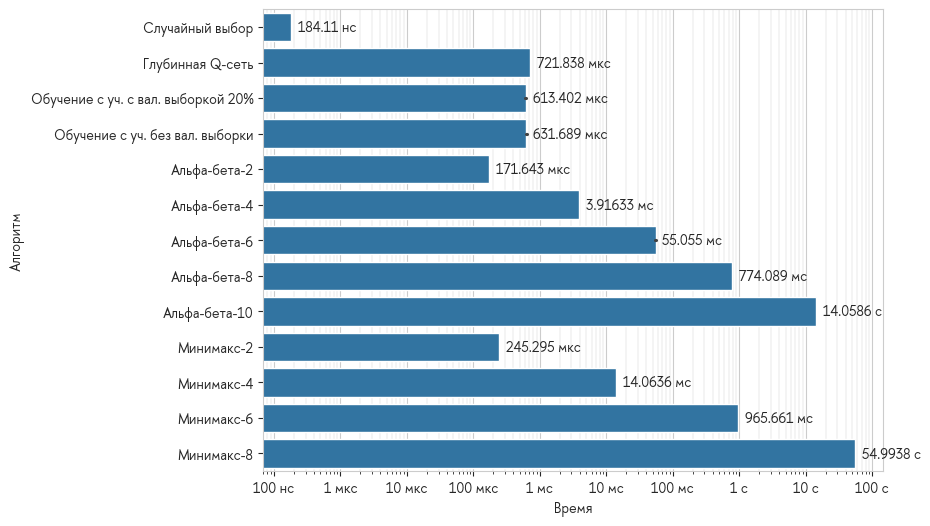

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, data=df_mod, x='time', y='name')
ax.set_xscale('log')
ax.set_xlabel('Время')
ax.set_ylabel('Алгоритм')
ax.xaxis.set_major_formatter(EngFormatter(unit="с"))
ax.xaxis.set_major_locator(LogLocator(numticks=10))
ax.xaxis.set_minor_locator(LogLocator(subs=np.arange(0.1,1,0.1), numticks=10))
ax.grid(which='minor', linewidth=0.3)
ax.bar_label(ax.containers[0], fmt=EngFormatter(unit="с"), padding=5)

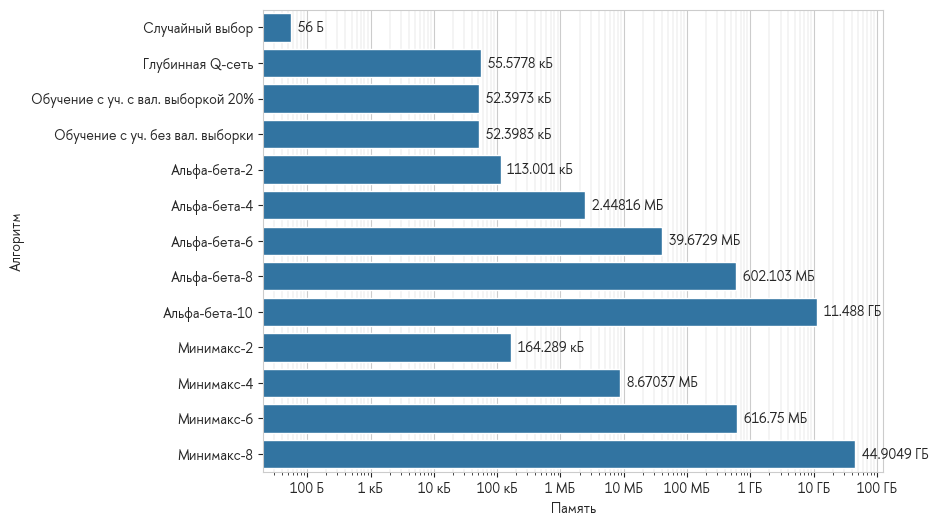

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, data=df_mod, x='memory', y='name')
ax.set_xscale('log')
ax.set_xlabel('Память')
ax.set_ylabel('Алгоритм')
ax.xaxis.set_major_formatter(EngFormatter(unit="Б"))
ax.xaxis.set_major_locator(LogLocator(numticks=10))
ax.xaxis.set_minor_locator(LogLocator(subs=np.arange(0.1,1,0.1), numticks=10))
ax.grid(which='minor', linewidth=0.3)
ax.bar_label(ax.containers[0], fmt=EngFormatter(unit="Б"), padding=5);

In [8]:
score_df = pd.read_csv('eloscores.csv')
score_df

,random,mldqn,mlval20,mlnoval,minimax2,minimax4,minimax6,minimax8,minimax10
0,1398,1738,1742,1895,1863,1894,1889,1902,1879
1,1503,1702,1694,1912,1862,1874,1885,1899,1869
2,1515,1636,1810,1887,1844,1882,1876,1861,1889
3,1509,1711,1734,1898,1832,1849,1886,1915,1866
4,1569,1751,1722,1842,1809,1923,1879,1834,1871
5,1421,1772,1744,1845,1846,1861,1897,1898,1916
6,1523,1741,1733,1880,1808,1863,1870,1911,1871
7,1492,1783,1703,1864,1825,1874,1869,1917,1873
8,1429,1725,1756,1900,1852,1891,1875,1890,1882
9,1417,1712,1723,1917,1834,1862,1921,1884,1930


In [9]:
data = score_df.melt()
data

,variable,value
0,random,1398
1,random,1503
2,random,1515
3,random,1509
4,random,1569
...,...,...
85,minimax10,1916
86,minimax10,1871
87,minimax10,1873
88,minimax10,1882


In [10]:
data = data.replace({
    'variable': {
        'random': 'Случайный выбор',
        'minimax2': 'Минимакс-2',
        'mlnoval': 'Обучение с уч. без вал. выборки',
        'minimax4': 'Минимакс-4',
        'minimax6': 'Минимакс-6',
        'minimax8': 'Минимакс-8',
        'minimax10': 'Минимакс-10',
        'alphabeta2': 'Альфа-бета-2',
        'alphabeta4': 'Альфа-бета-4',
        'alphabeta6': 'Альфа-бета-6',
        'alphabeta8': 'Альфа-бета-8',
        'alphabeta10': 'Альфа-бета-10',
        'mlval20': 'Обучение с уч. с вал. выборкой 20%',
        'mldqn': 'Глубинная Q-сеть'
    }
})
data

,variable,value
0,Случайный выбор,1398
1,Случайный выбор,1503
2,Случайный выбор,1515
3,Случайный выбор,1509
4,Случайный выбор,1569
...,...,...
85,Минимакс-10,1916
86,Минимакс-10,1871
87,Минимакс-10,1873
88,Минимакс-10,1882


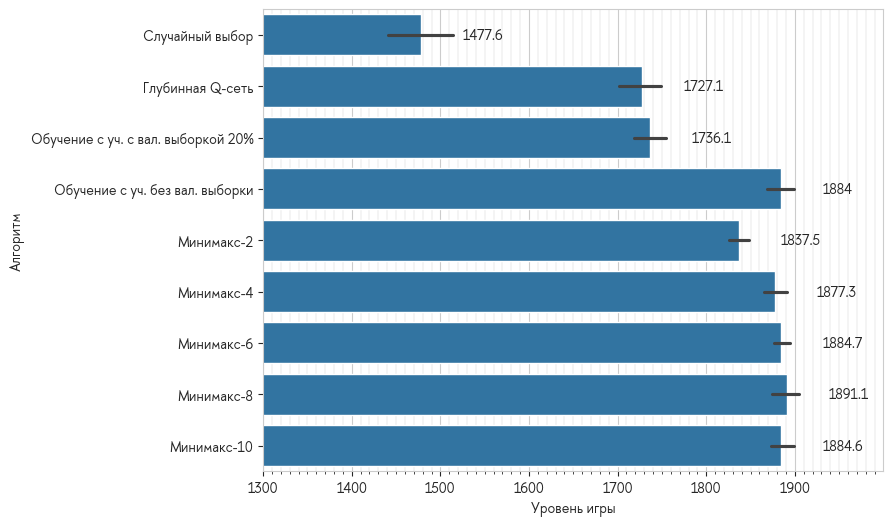

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, data=data, x='value', y='variable')
ax.set_xlabel('Уровень игры')
ax.set_ylabel('Алгоритм')
ax.set_xlim(left=1300)
ax.xaxis.set_minor_locator(MultipleLocator(base=10))
ax.grid(which='minor', linewidth=0.3)
ax.bar_label(ax.containers[0], padding=30);

In [14]:
import scipy.stats as st

data.groupby('variable').apply(lambda a: st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))

variable
Глубинная Q-сеть                      ([1697.4657411666112], [1756.7342588333886])
Минимакс-10                           ([1869.1494684177562], [1900.0505315822436])
Минимакс-2                            ([1823.4809107684869], [1851.5190892315131])
Минимакс-4                            ([1862.0239705651943], [1892.5760294348056])
Минимакс-6                              ([1873.632884311849], [1895.767115688151])
Минимакс-8                            ([1872.4993448088176], [1909.7006551911822])
Обучение с уч. без вал. выборки       ([1865.2909892293974], [1902.7090107706026])
Обучение с уч. с вал. выборкой 20%     ([1713.219883445163], [1758.9801165548367])
Случайный выбор                       ([1436.8348371723573], [1518.3651628276425])
dtype: object